# Introduction to NetworkX

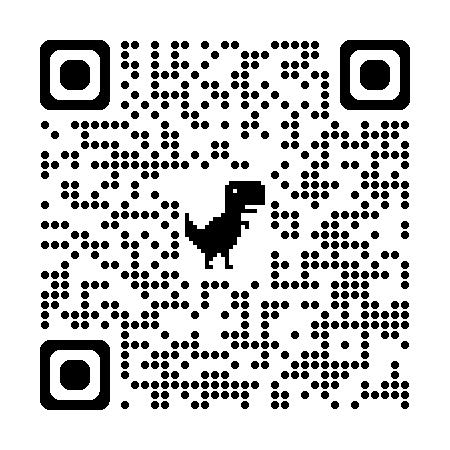

In this notebook, we will explore some fundamental concepts in network theory using NetworkX in Python.

- **NetworkX**: [https://networkx.github.io/documentation/stable/index.html](https://networkx.github.io/documentation/stable/index.html)

We will:
1) **Create various types of graphs**;
2) **Visualize the graphs** to better understand their structure;
3) **Analyze key properties**, such as degree distribution and clustering coefficient;
4) **Perform statistical tests** to identify the underlying distribution of the degree (e.g., power law, exponential distribution, etc.).

Alternatives to NetworkX

Handling networks with Python is straightforward, thanks to various open-source libraries, including:

- **Igraph**: [https://igraph.org/python/](https://igraph.org/python/)
- **Graph-tool**: [https://graph-tool.skewed.de/](https://graph-tool.skewed.de/)

These libraries can often perform the same types of analyses on a given network, 
but they differ in terms of performance and documentation clarity.
- **Documentation (from most to least clear):** NetworkX, igraph, graph-tool.
- **Performance (from fastest to slowest):** graph-tool, igraph, NetworkX.

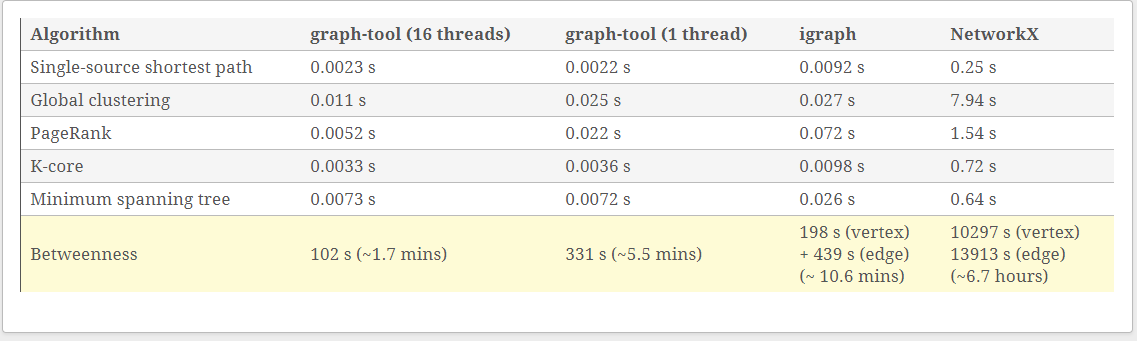

In [1]:
from IPython.display import Image
Image(filename='libraries_comparison.PNG') 

In [2]:
# First step: Import necessary libraries
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations, arrays, and matrices
import powerlaw  # For analyzing heavy-tailed distributions, including power laws
import networkx as nx  # For creating and analyzing networks (graphs)
import time  # For measuring time and handling time-related functions
import timeit  # For timing code execution (performance testing)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import scipy.stats  # For statistical functions and probability distributions
from collections import Counter  # For counting elements (useful for degree distributions)

## Creating a simple graph

We will first create a simple undirected graph with a few nodes and edges.

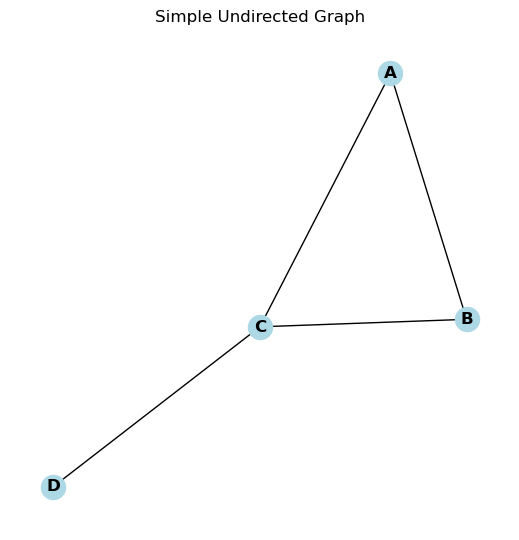

In [3]:
# Creating a simple undirected graph
G = nx.Graph()

# Adding nodes and edges
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'C')
G.add_edge('C', 'D')

# Drawing the graph
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold')
plt.title('Simple Undirected Graph')
plt.show()

## Reading from an edgelist

In [4]:
# Define the path of the edge list file
path_file = 'BA_model.txt'

# Load the edge list using pandas
edge_list = pd.read_csv(path_file, delimiter=' ', names=['source', 'target'])

In [5]:
edge_list[:10]

,source,target
0,0,5
1,0,6
2,0,15
3,0,72
4,0,92
5,0,162
6,0,249
7,0,258
8,0,290
9,0,292


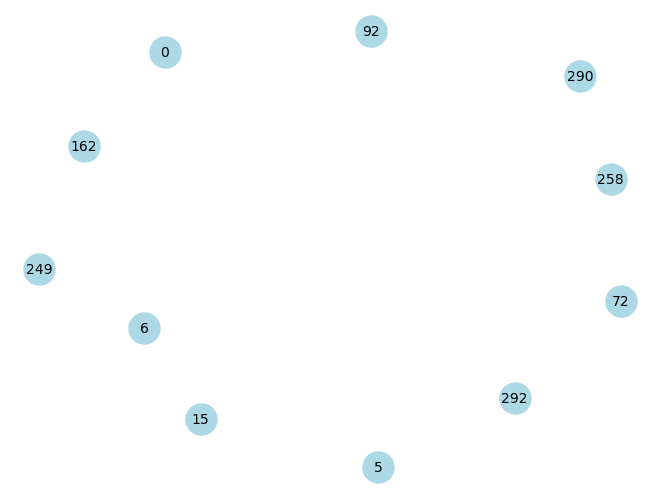

Nodes in the graph: [0, 5, 6, 15, 72, 92, 162, 249, 258, 290, 292]


In [6]:
# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph
# We are considering the first 10 rows of the edge_list for example purposes
nodes = [0, 5, 6, 15, 72, 92, 162, 249, 258, 290, 292]
G.add_nodes_from(nodes)

# Visualize the graph with labels
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
plt.show()

# Display the nodes in the graph
print("Nodes in the graph:", list(G.nodes))


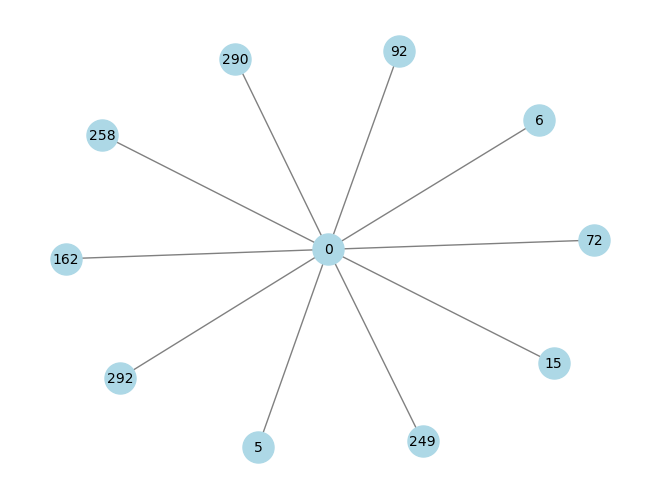

Edges in the graph: [(0, 5), (0, 6), (0, 15), (0, 72), (0, 92), (0, 162), (0, 249), (0, 258), (0, 290), (0, 292)]


In [7]:
# Add edges to the graph
for _, row in edge_list[:10].iterrows():
    # Add edge between source and target from each row
    G.add_edge(row['source'], row['target'])

# Visualize the graph with the added edges
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=10, edge_color='gray')
plt.show()

# Display the edges in the graph
print("Edges in the graph:", list(G.edges))


In the previous example, we only considered the first 10 rows of the edge list.
To obtain the complete graph, you can either:

1. Repeat the previous steps but consider the entire edge list.
2. Use a built-in function from NetworkX, which makes loading an edge list more efficient:

```python
G = nx.read_edgelist("BA_model.txt", delimiter=' ', nodetype=int)
```

This function reads the edge list directly from the file and constructs the graph automatically.

In [8]:
# Measure the time taken to read the edge list and create the graph
start = time.time()
G = nx.read_edgelist(path_file)
final_nx = time.time() - start
print(f"Time taken to load the graph: {final_nx:.4f} seconds")

Time taken to load the graph: 0.2310 seconds


In [9]:
# Initialize an empty graph
G1 = nx.Graph()

# Measure the time taken to add edges manually
start = time.time()

# Add edges from the edge list
for _, row in edge_list.iterrows():
    G1.add_edge(row['source'], row['target'])

final_naive = time.time() - start
# Print the time taken to add all edges
print(f"Time taken to add edges with iterrows: {final_naive:.4f} seconds")

Time taken to add edges with iterrows: 4.0885 seconds


In [10]:
print(f"final_naive (itertuples) /final_nx (read_edgelist): {final_naive/final_nx:.2f} ")

final_naive (itertuples) /final_nx (read_edgelist): 17.70 


In [11]:
# Initialize an empty graph
G1 = nx.Graph()

# Measure the time taken to add edges using itertuples (faster method)
start = time.time()

# Add edges from the edge list using itertuples
for row in edge_list.itertuples(index=False):
    G1.add_edge(row.source, row.target)

final_advanced = time.time() - start

In [12]:
print(f"final_naive (itertuples) /final_nx (read_edgelist): {final_advanced/final_nx:.2f} ")

final_naive (itertuples) /final_nx (read_edgelist): 0.58 


## Benchmarking Multiple Functions

In [13]:
# Define the function for creating the graph and adding edges
def create_graph():
    G1 = nx.Graph()
    for row in edge_list.itertuples(index=False):
        G1.add_edge(row.source, row.target)
        
def create_graph_nx():
    G = nx.read_edgelist(path_file)

# Now use timeit to run this function 50 times
execution_time = timeit.timeit(create_graph, number=50)

# Now use timeit to run this function 50 times
execution_time_nx = timeit.timeit(create_graph, number=50)

print(f"Total time for 50 realizations: {execution_time:.4f} seconds")
print(f"Average time per realization: {execution_time / 50:.4f} seconds")
print('\n')
print(f"Total time for 50 realizations nx: {execution_time_nx:.4f} seconds")
print(f"Average time per realization nx: {execution_time_nx / 50:.4f} seconds")


Total time for 50 realizations: 6.7222 seconds
Average time per realization: 0.1344 seconds


Total time for 50 realizations nx: 7.1014 seconds
Average time per realization nx: 0.1420 seconds


Why should we use a library if we can write code that performs the same tasks?

1) **Efficiency**: We don’t need to reinvent the wheel each time. Libraries provide pre-built, reliable solutions for common tasks.
   
2) **Optimization**: Libraries are generally optimized for performance. Achieving the same level of optimization on your own could take days or even weeks of effort.

#### However...

Always review the implementation of the algorithms you're using. Never treat open-source libraries as a black box—understanding the underlying algorithms helps ensure you're using them correctly and can identify limitations or improvements when necessary.

## The Degree Distribution: \( P(k) \)

To compute the degree distribution of a network, follow these steps:

a) **Compute the degree sequence**: This is a list of degrees for all the nodes in the network (i.e., how many connections each node has).

b) **Calculate the frequency of each degree value (k)**: Determine how often each degree \( k \) appears in the degree sequence.

c) **Normalize the frequencies**: Divide the frequency of each degree by the total number of nodes to obtain the degree distribution \( P(k) \).

---

This process gives the probability distribution of degrees in the network, where \( P(k) \) represents the likelihood of a node having degree \( k \).

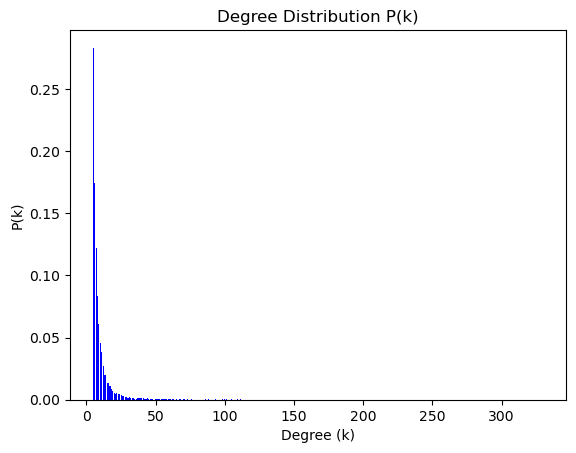

In [14]:
# Compute the degree sequence (degree of each node)
degree_sequence = [degree for node, degree in G.degree()]

# Compute the frequency for each degree value (k)
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# Normalize the frequencies to get the degree distribution P(k)
total_nodes = len(G)
degree_distribution = {k: count / total_nodes for k, count in degree_count.items()}

# Plot the degree distribution
plt.bar(degree_distribution.keys(), degree_distribution.values(), width=0.8, color='blue')
#plt.xscale('log')
#plt.yscale('log')
plt.title("Degree Distribution P(k)")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.show()

### What do I get if I sum up all the elements in the degree sequence?

- a) \( E \): the number of edges
- b) \( 2E \): twice the number of edges
- c) \( 4E \): four times the number of edges



The correct answer is **b) \( 2E \)**: twice the number of edges.

This result is known as the **degree sum formula** (or the **handshaking lemma**), which states that the sum of all node degrees in an undirected graph is twice the number of edges, i.e.,

 $\sum_i k_i$=2|E|
 
Where:
- $\sum_i k_i$ is the sum of the degrees of all nodes.
- |E| is the number of edges.

You can verify this using the **`number_of_edges()`** function in NetworkX:

In [15]:
# Total number of edges in the graph
print("Number of edges (E):", G.number_of_edges())

# Sum of degrees of all nodes
print("Sum of degrees:", np.sum(degree_sequence))

# Verify that the sum of degrees is twice the number of edges
print(np.sum(degree_sequence) == 2 * G.number_of_edges())  # Should print True

Number of edges (E): 49975
Sum of degrees: 99950
True


## Kolmogorov-Smirnov (KS) test 
$ p(k) \sim C * ? $

The **Kolmogorov-Smirnov (KS) test** is a non-parametric statistical test that is used to compare a sample distribution with a reference probability distribution (one-sample KS test) or to compare two sample distributions (two-sample KS test). It helps determine whether the distributions are significantly different.

### Key Points:
1. **Purpose**: The KS test measures the distance between the empirical cumulative distribution function (ECDF) of the sample and the cumulative distribution function (CDF) of the reference distribution.
   
2. **KS Statistic (D-statistic)**: The test computes the maximum absolute difference (denoted as D ) between the ECDF of the sample and the CDF of the reference distribution. The larger the D-statistic, the more different the two distributions are. $D = \max |F_n(x) - F(x)| $.

3. **P-value**: The p-value quantifies the significance of the observed difference. A small p-value (typically < 0.05) suggests that the sample does not come from the reference distribution. $ p = Q_{\text{KS}}(\sqrt{n}D) $ where where $ Q_{\text{KS}}(x) $ is the **Kolmogorov distribution**.


### Steps of the KS Test:

#### One-Sample KS Test:
This is used to determine if a sample comes from a specific theoretical distribution, such as a normal, exponential, or power-law distribution.

1. **Null Hypothesis**: The sample follows the reference distribution.
2. **Alternative Hypothesis**: The sample does not follow the reference distribution.
3. **Test Statistic**: Calculate the \(D\)-statistic, which represents the largest absolute difference between the sample's ECDF and the reference CDF.
4. **Result**: If the p-value is less than a chosen significance level (e.g., 0.05), reject the null hypothesis.

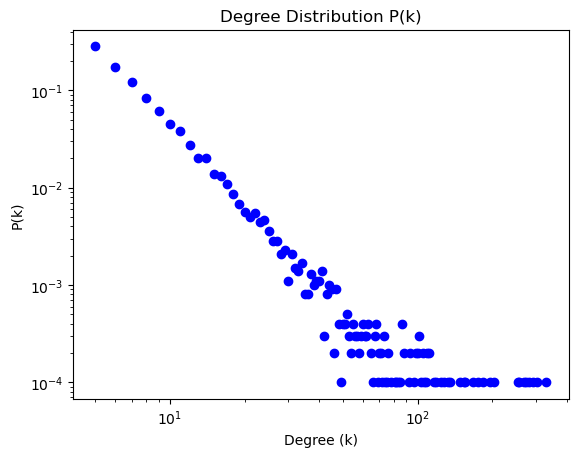

In [16]:
# Plot the degree distribution
plt.plot(degree_distribution.keys(), degree_distribution.values(), 'o', color='blue')
plt.title("Degree Distribution P(k)")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.xscale('log')
plt.yscale('log')
plt.show()

The **Complementary Cumulative Distribution Function (CCDF)** is the complement of the **Cumulative Distribution Function (CDF)**. For a power-law distribution, the CDF and CCDF have specific forms, and the CCDF is particularly useful for visualizing and estimating the scaling exponent \( \gamma \) of the distribution.

### Power-Law CCDF Formula:

For a power-law distribution:

$
P(X \geq x) \propto x^{-\alpha}
$

where:
- $ P(X \geq x) $ is the **CCDF**,
- $ x $ is the value of the degree,
- $ \alpha $ is the **scaling exponent** of the power-law distribution.

### Deriving the CCDF from the PDF:

Given the **Probability Density Function (PDF)** for a power-law distribution:

$
p(x) \propto x^{-\gamma}
$

The **Cumulative Distribution Function (CDF)** is given by:

$
F(x) = P(X \leq x) = \int_{x_{\min}}^{x} p(x') dx' \propto 1 - x^{1 - \gamma}
$

Thus, the **Complementary Cumulative Distribution Function (CCDF)**, which is $ P(X \geq x) = 1 - F(x) $, is:

$
\text{CCDF}(x) = P(X \geq x) \propto x^{-\beta}
$

where $ \beta = \gamma - 1 $ is the scaling exponent for the CCDF.

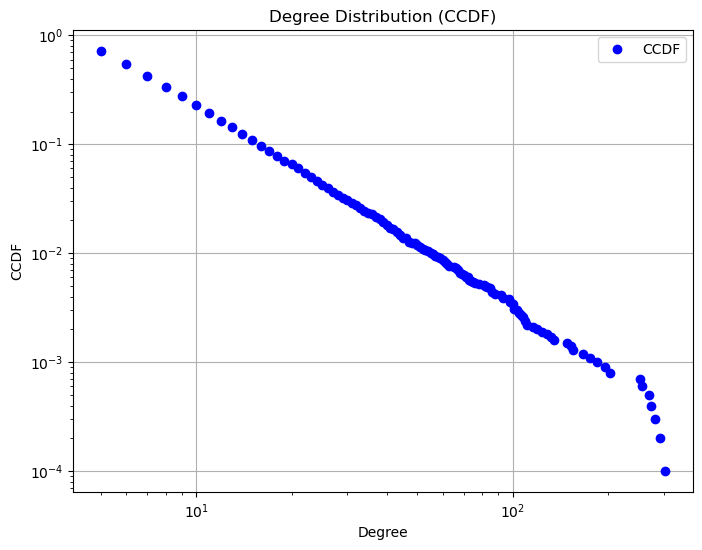

In [17]:
# Count the frequency of each degree
degree_count = Counter(degree_sequence)

# Sort the degree and frequency values by degree
degrees = np.array(sorted(degree_count.keys()))  # Sorted degrees
counts = np.array([degree_count[degree] for degree in degrees])  # Corresponding sorted counts

# Compute the PDF (Probability Density Function)
pdf = counts / np.sum(counts)

# Compute the CDF (Cumulative Distribution Function)
cdf = np.cumsum(pdf)

# Compute the CCDF (Complementary CDF) as 1 - CDF
ccdf = 1 - cdf

# Filter out points where CCDF is below 10^-10
mask = ccdf > 1e-10
filtered_degrees = degrees[mask]
filtered_ccdf = ccdf[mask]

# Plot the CCDF
plt.figure(figsize=(8, 6))
plt.plot(filtered_degrees, filtered_ccdf, 'o', color='blue', label='CCDF')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.title('Degree Distribution (CCDF)')
plt.grid(True)
plt.legend()
plt.show()


Empirical networks are typically **scale-free** between  $ k_{\min} $ and $ k_{\max} $.

The probability distribution is given by:

$$
p(k) = \frac{\gamma - 1}{k_{\min}} \left(\frac{k}{k_{\min}}\right)^{-\gamma}
$$

To fully define the power-law distribution, we need to estimate the
two parameters $ \gamma $ and $ k_{\min} $ that best fit the data.

### The Scaling Parameter  $ \gamma \$

The **scaling parameter** $ \hat{\gamma} $ can be computed using the **method of maximum likelihood**:

$$
\hat{\gamma} = 1 + N \left[ \sum_{i=1}^N \ln\left(\frac{k_i}{k_{\min}}\right) \right]^{-1}
$$

The standard error $ \sigma $ is:

$$
\sigma = \frac{\hat{\gamma} - 1}{\sqrt{N}}
$$

### Estimating $ k_{\min} $

To estimate $ k_{\min} $, we use the **Kolmogorov-Smirnov (KS) statistic**, which measures the maximum distance between the cumulative distribution functions (CDFs) of the data and the fitted model:

$$
D = \max_{k \geq k_{\min}} |S(x) - P(x)|
$$

Here, $ S(x) $ is the CDF of the data, and $ P(x) $ is the CDF of the power-law model for $ k \geq k_{\min} $. The value of $k_{\min} $ is chosen to minimize \( D \).

### The Recipe:

For each $ k_{\min} $ in a range of possible values (KMIN_RANGE):

1. Compute $ \hat{\gamma}$.
2. Calculate the KS statistic $ D $.
3. Store $ k_{\min}, \hat{\gamma}, D $.
4. Repeat for all $ k_{\min} $ values.
5. Select the $ k_{\min} $ that minimizes $ D $.

For more details, refer to:

Clauset, Aaron, Cosma Rohilla Shalizi, and Mark EJ Newman. "Power-law distributions in empirical data." SIAM review 51.4 (2009): 661-703.

Alstott, Jeff, Ed Bullmore, and Dietmar Plenz. "powerlaw: a Python package for analysis of heavy-tailed distributions." PloS one 9.1 (2014): e85777.

Fortunately, the **powerlaw** library automates this entire process for us.

Calculating best minimal value for power law fit
Scaling Exponent (gamma): 2.88
Minimum Degree (k_min): 10.0
KS Statistic: 0.005762489853311126


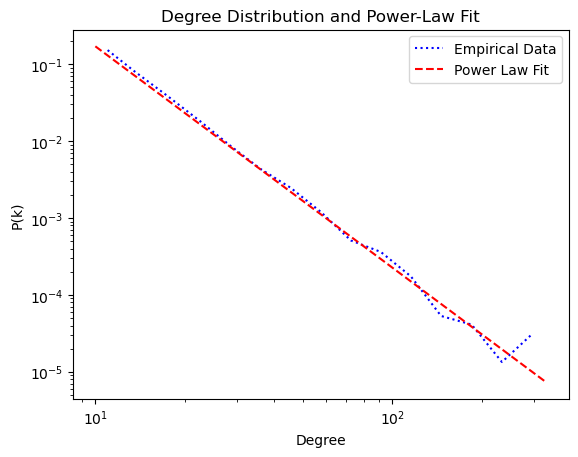

In [18]:
# Fit the degree sequence to a power-law distribution using the powerlaw package
fit = powerlaw.Fit(degree_sequence, discrete=True)  # Use discrete=True since degrees are integers

# Extract the scaling exponent (alpha) and the minimum degree (k_min)
alpha = fit.alpha
k_min = fit.xmin

# Print the results
print('Scaling Exponent (gamma):', round(alpha,2))
print('Minimum Degree (k_min):', k_min)

# This generates a p-value by comparing the empirical data to synthetic data
ks_statistic = fit.power_law.KS()

# Print the KS statistic and p-value (goodness of fit)
print(f"KS Statistic: {ks_statistic}")

# Calculate the p-value using the KS statistic and the number of data points
#n = len(degree_sequence)
#p_value = scipy.stats.kstwo.sf(ks_statistic, n)
#print(f"P-value: {p_value}")

# Interpretation of the goodness-of-fit:
#if p_value < 0.05:
#    print("The degree distribution does not follow a power-law distribution.")
#else:
#    print("The degree distribution may follow a power-law distribution.")


# Step: Visualize the empirical degree distribution and the fitted power-law model
fig = fit.plot_pdf(label='Empirical Data', color='blue',linestyle=':')
#fig = plt.plot(degree_distribution.keys(), degree_distribution.values(), 'o', color='blue')
#fig = powerlaw.plot_pdf(degree_sequence, linear_bins=True, color='r',label='Empirical Data',)
fit.power_law.plot_pdf(label='Power Law Fit', color='red', linestyle='--', ax=fig)
plt.legend()
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.title('Degree Distribution and Power-Law Fit')
plt.show()


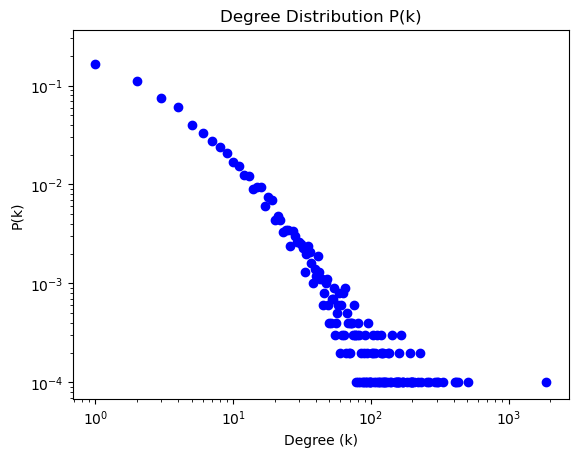

In [19]:
# Generate a random degree sequence from a log-normal distribution
N = 10000  # Number of nodes (degree sequence length)
mu, sigma = 1, 1.5  # Mean and standard deviation for the log-normal distribution

# Generate degrees following a log-normal distribution
degree_sequence = np.random.lognormal(mu, sigma, N).astype(int)


# Step b: Compute the frequency for each degree value (k)
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# Step c: Normalize the frequencies to get the degree distribution P(k)
total_nodes = len(G)
degree_distribution = {k: count / total_nodes for k, count in degree_count.items()}

# Plot the degree distribution
plt.plot(degree_distribution.keys(), degree_distribution.values(), 'o', color='blue')
plt.title("Degree Distribution P(k)")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.xscale('log')
plt.yscale('log')
plt.show()

Calculating best minimal value for power law fit
Scaling Exponent (gamma): 2.61
Minimum Degree (k_min): 30.0
KS Statistic: 0.028848395154899675


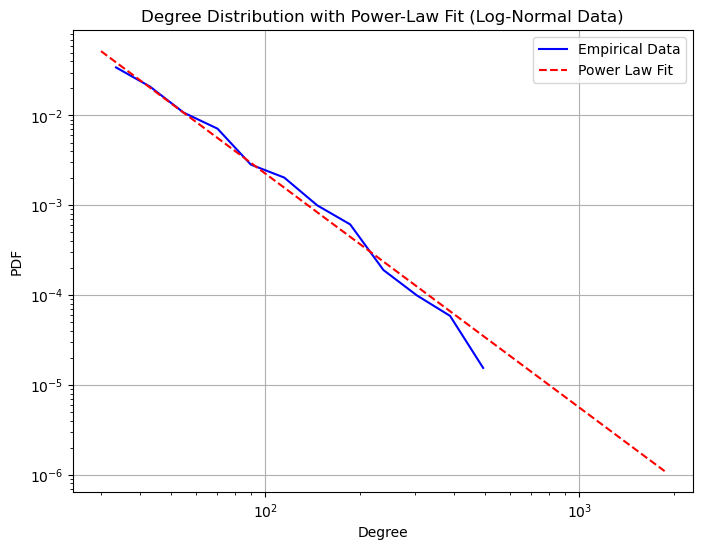

In [20]:
# Ensure no degree is zero (since degrees must be positive integers)
degree_sequence = degree_sequence[degree_sequence > 0]

# Fit the degree sequence to a power-law distribution using the powerlaw package
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Compute the KS statistic and p-value for the power-law fit
ks_statistic = fit.power_law.KS()

# Extract the scaling exponent (alpha) and the minimum degree (k_min)
alpha = fit.alpha
k_min = fit.xmin

# Print the results
print('Scaling Exponent (gamma):', round(alpha,2))
print('Minimum Degree (k_min):', k_min)
print('KS Statistic:', ks_statistic)

# Plot the empirical degree distribution and the fitted power-law model
fig, ax = plt.subplots(figsize=(8, 6))

# Plot empirical degree distribution
fit.plot_pdf(ax=ax, label='Empirical Data', color='blue')

# Plot power-law fit
fit.power_law.plot_pdf(ax=ax, label='Power Law Fit', color='red', linestyle='--')

# Customize the plot
ax.set_xlabel('Degree')
ax.set_ylabel('PDF')
ax.set_title('Degree Distribution with Power-Law Fit (Log-Normal Data)')
ax.legend()
plt.grid(True)
plt.show()


The **probability density function (PDF)** of a log-normal distribution is given by:

$
P(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right)
$

where:
- $x > 0$ is the variable (e.g., degree),
- $\mu$ is the mean of the logarithm of the variable,
- $\sigma$ is the standard deviation of the logarithm of the variable (also called the shape parameter).

As the **variance**  $\sigma $ of a **log-normal distribution** increases, its tail becomes heavier, and in the limit where $\sigma \to \infty$, it begins to resemble a **power-law distribution**. This explains why log-normal distributions can sometimes be mistaken for power-laws in empirical data, especially in networks with long-tailed degree distributions.

Let me know if you need further clarification!

### Scale-free or heavy-tailed?

While **scale-free networks** follow a power-law degree distribution 
$ P(k) \propto k^{-\gamma} $, not all networks with long tails
are truly scale-free. **Heavy-tailed distributions**
like **log-normal** or **exponential** can sometimes
resemble power-laws, especially in certain regions. This can lead
to misleading results when fitting a power-law model,
as these other distributions may also yield a
good fit with low KS statistics and high p-values.

It’s important to test alternative models, as
visual inspection alone is not sufficient to confirm a power-law structure in the data.


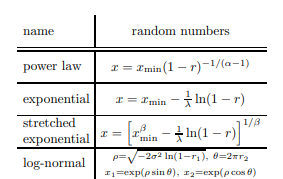

In [21]:
Image(filename='heavy.PNG') 

### Likelihood Ratio Test.

The **likelihood ratio test** is a statistical method used to compare
two competing models and determine which one fits the data better.
It does this by comparing how likely the data is under each model,
using a metric called the **log-likelihood ratio**.

### Basic Idea:
The test computes the **likelihood** of the data under each model, meaning how well each model explains the data. The model with the higher likelihood is considered the better fit. To quantify this, we calculate the **log-likelihood ratio** $ R $, which measures the difference between the likelihoods of the two models.

### Log-Likelihood Ratio Formula:

$
R = \sum_i \left( \ln p_1(k_i) - \ln p_2(k_i) \right)
$

Where:
- $ p_1(k_i) $ is the probability of observing data point $ k_i $ under the first model.
- $ p_2(k_i) $ is the probability of observing $ k_i $ under the second model.
- $ R $ is the sum of the difference in the log-likelihoods for all data points $ k_i $.

### Interpretation of $ R $:
- If  R > 0 : The first model (e.g., power-law) fits the data better.
- If  R < 0 : The second model (e.g., exponential) fits the data better.
- If  R = 0 : Both models fit the data equally well.

The log-likelihood ratio $ R $ can sometimes be close to zero due to random fluctuations in the data. In such cases, small differences in $ R $ don't necessarily indicate a significant difference between the models. For example, you might observe:

- $ R_1 = +0.001 $ (slightly favoring model 1)
- $ R_2 = -0.001 $ (slightly favoring model 2)

These small differences could result from noise rather than a genuine difference in the models.

### Measuring Confidence with $ \sigma $:
To judge whether $ R $ is significant, we need to calculate the **standard deviation** $ \sigma $ of the log-likelihood ratio. The standard deviation tells us how much $ R $ is expected to fluctuate due to randomness in the data.

The standard deviation of $ R $ is given by:

$
\sigma^2 = \frac{1}{N} \sum_i \left[ \left( l_i^1 - l_i^2 \right) - \left( \bar{l}_i^1 - \bar{l}_i^2 \right) \right]^2
$

Where:
- $l_i^1 = \ln p_1(k_i) $ and $ l_i^2 = \ln p_2(k_i) $ are the log-likelihoods for each model and data point.
- $ \bar{l}_i^1 $ and $ \bar{l}_i^2 $ are the average log-likelihoods for the models.

### Calculating the P-Value:
We can also compute a **p-value** to determine whether the observed value of R  is significant. The p-value quantifies the likelihood that the observed  R  occurred by chance.

The p-value is computed as:

$
p = \left| \text{erfc}\left( \frac{R}{\sqrt{2N} \sigma} \right) \right|
$

Where **erfc** is the complementary error function.

### Conclusion:
- The **log-likelihood ratio** test helps us compare two models and determine which fits the data better.
- We calculate the log-likelihood ratio $ R$ to compare the likelihoods of the two models.
- To ensure that small fluctuations don’t mislead us, we compute the standard deviation $ \sigma $ and the **p-value** to assess the statistical significance of $ R $.
  
The **powerlaw** package performs these calculations for you, making it easy to apply the likelihood ratio test to your data.

In [22]:
# Extract the degree sequence from the graph
degree_sequence = [degree for node, degree in G.degree()]

# Fit the degree sequence to a power-law distribution (discrete)
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Compare the power-law fit with a log-normal fit
R, p_value = fit.distribution_compare('power_law', 'lognormal_positive')

# Print the log-likelihood ratio and p-value
print(f"Log-Likelihood Ratio (R): {R}")

# Interpretation of the goodness-of-fit:
if p_value < 0.05:
    print("The power-law one model fits the data better than the lognormal.")
else:
    print("The lognormal one model fits the data better than the power-law.")

Calculating best minimal value for power law fit
Log-Likelihood Ratio (R): 21.181503555968426
The power-law one model fits the data better than the lognormal.


In [23]:
# Generate a random degree sequence from a log-normal distribution
N = 10000  # Number of nodes (degree sequence length)
mu, sigma = 1, 2.  # Mean and standard deviation for the log-normal distribution

# Generate degrees following a log-normal distribution
degree_sequence = np.random.lognormal(mu, sigma, N).astype(int)


# Fit the degree sequence to a power-law distribution (discrete)
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Compare the power-law fit with a log-normal fit
R, p_value = fit.distribution_compare('power_law', 'lognormal_positive')

# Print the log-likelihood ratio and p-value
print(f"Log-Likelihood Ratio (R): {R}")

# Interpretation of the goodness-of-fit:
if p_value < 0.05:
    print("The power-law one model fits the data better than the lognormal.")
else:
    print("The lognormal one model fits the data better than the power-law.")

Calculating best minimal value for power law fit
Log-Likelihood Ratio (R): -4.4677535322547595
The lognormal one model fits the data better than the power-law.


Values less than or equal to 0 in data. Throwing out 0 or negative values


### Stochastic Graph Generators

We can easily generate some of the most common synthetic networks using built-in functions in **NetworkX**:

1. **Erdős–Rényi Model**:
   - Function: `erdos_renyi_graph()`
   - Degree Distribution: $ P(k) \sim \text{binomial}(N, p)$
   - This model generates a random graph where each edge between two nodes is included with a probability $ p $. For large     N  and small  p , the degree distribution approaches a **Poisson** distribution.
   - [Erdős–Rényi Graph Documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html)

   ```python
   G_erdos_renyi = nx.erdos_renyi_graph(N=1000, p=0.01)
   ```

2. **Watts–Strogatz Model**:
   - Function: `watts_strogatz_graph()`
   - Degree Distribution: $ P(k) \sim \delta_\text{Dirac}(N, \beta) $
   - This model creates a **small-world network** by rewiring a regular ring lattice with probability $ \beta $, preserving high clustering and introducing short average path lengths.
   - [Watts–Strogatz Graph Documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html)

   ```python
   G_watts_strogatz = nx.watts_strogatz_graph(N=1000, k=10, p=0.1)
   ```

3. **Barabási–Albert Model**:
   - Function: `barabasi_albert_graph()`
   - Degree Distribution: $ P(k) \sim \text{power-law}(N, \gamma) $
   - This model generates a **scale-free network** using a preferential attachment mechanism, resulting in a power-law degree distribution with exponent $ \gamma $.
   - [Barabási–Albert Graph Documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html)

   ```python
   G_barabasi_albert = nx.barabasi_albert_graph(N=1000, m=5)
   ```

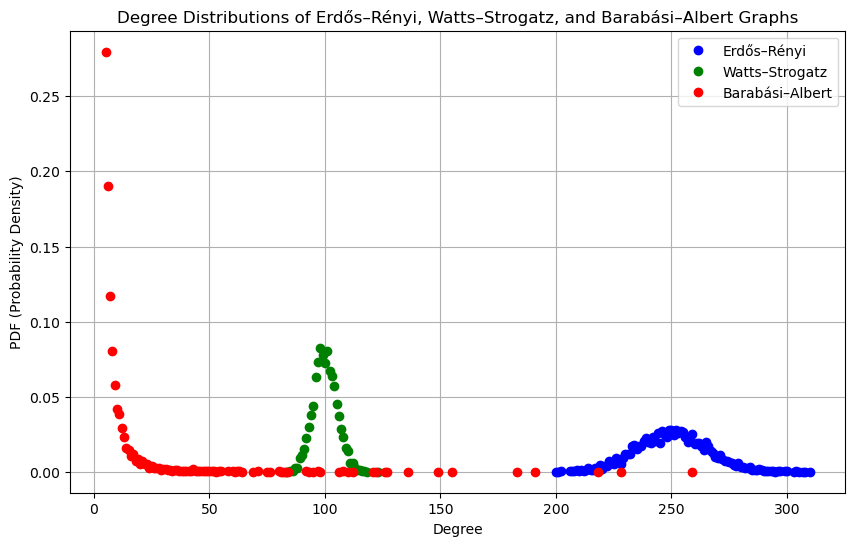

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Set up the parameters for the graphs
N = 5000  # Number of nodes

# Erdős–Rényi Graph
p_erdos = 0.05
G_erdos_renyi = nx.erdos_renyi_graph(N, p_erdos)

# Watts–Strogatz Graph
k_watts = 100  # Each node is connected to k nearest neighbors in ring topology
p_watts = 0.3  # The probability of rewiring each edge
G_watts_strogatz = nx.watts_strogatz_graph(N, k_watts, p_watts)

# Barabási–Albert Graph
m_barabasi = 5  # Number of edges to attach from a new node to existing nodes
G_barabasi_albert = nx.barabasi_albert_graph(N, m_barabasi)

# Function to plot the degree distributions
def plot_degree_distribution(G, label, color):
    # Extract the degree sequence
    degree_sequence = [d for n, d in G.degree()]
    degree_count = Counter(degree_sequence)
    degrees, counts = zip(*degree_count.items())
    
    # Normalize the counts to get the PDF (Probability Density Function)
    pdf = [count / sum(counts) for count in counts]
    
    # Plot
    plt.plot(degrees, pdf, 'o', label=label, color=color)

# Plot all the degree distributions together
plt.figure(figsize=(10, 6))

# Erdős–Rényi
plot_degree_distribution(G_erdos_renyi, label="Erdős–Rényi", color="blue")

# Watts–Strogatz
plot_degree_distribution(G_watts_strogatz, label="Watts–Strogatz", color="green")

# Barabási–Albert
plot_degree_distribution(G_barabasi_albert, label="Barabási–Albert", color="red")

# Customize the plot
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PDF (Probability Density)')
plt.title('Degree Distributions of Erdős–Rényi, Watts–Strogatz, and Barabási–Albert Graphs')
plt.legend()
plt.grid(True)
plt.show()

## The Small-World (1° requirement)

In networks that exhibit the **small-world property**, 
the average shortest path length $ L $ between any two random nodes scales as:

$
L \propto \log N
$

This means that even in very large networks,
the number of "hops" required to connect any two nodes remains relatively small.

In **NetworkX**, we can compute the average shortest path length of a network using the following function:

```python
nx.average_shortest_path_length(G)
```

This function calculates the average length of the shortest paths between all pairs of nodes in the graph $ G $.

For more details, see the [documentation](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length).


Computing for N=100
Computing for N=200
Computing for N=300
Computing for N=400
Computing for N=500
Computing for N=600
Computing for N=700
Computing for N=800
Computing for N=900


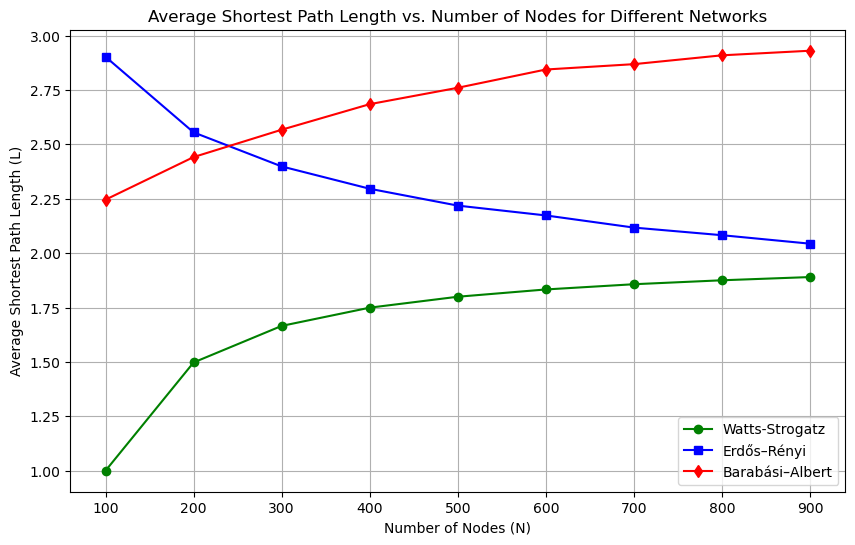

In [25]:
# Initialize lists to store average shortest path lengths
Lws, Ler, Lba = [], [], []

# Loop over different values of N (number of nodes)
for N in np.arange(100, 1000, 100):
    print(f"Computing for N={N}")  # For tracking progress
    # Watts-Strogatz model
    Lws.append(nx.average_shortest_path_length(nx.watts_strogatz_graph(N, k_watts, p_watts)))
    
    # Erdős-Rényi model
    Ler.append(nx.average_shortest_path_length(nx.erdos_renyi_graph(N, p_erdos)))
    
    # Barabási-Albert model
    Lba.append(nx.average_shortest_path_length(nx.barabasi_albert_graph(N, m_barabasi)))

# Plot the results
N_values = np.arange(100, 1000, 100)

plt.figure(figsize=(10, 6))
plt.plot(N_values, Lws, 'o-', label="Watts-Strogatz", color="green")
plt.plot(N_values, Ler, 's-', label="Erdős–Rényi", color="blue")
plt.plot(N_values, Lba, 'd-', label="Barabási–Albert", color="red")

# Customize the plot
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Shortest Path Length (L)')
plt.title('Average Shortest Path Length vs. Number of Nodes for Different Networks')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Initialize lists to store average shortest path lengths
Ler = []

# Loop over different values of N (number of nodes)
for N in np.arange(500, 5000, 500):
    
    print(f"Computing for N={N}")  # For tracking progress
    
    # Edge probability for logarithmic behavior
    p_erdos = 3 * np.log(N) / N

    # Erdős-Rényi model
    Ler.append(nx.average_shortest_path_length(nx.erdos_renyi_graph(N, p_erdos)))

Computing for N=500
Computing for N=1000
Computing for N=1500
Computing for N=2000
Computing for N=2500
Computing for N=3000
Computing for N=3500
Computing for N=4000
Computing for N=4500


- **Erdős–Rényi** Has logarithmic scaling, but the edge probability $ p $ affects the path length.:
  $
  L_{\text{ER}} \approx \frac{\log N}{\log (Np)}
  $
- **Watts–Strogatz** Initially has large path lengths (without rewiring), but adding rewiring $ \beta $ dramatically reduces the average shortest path length, giving it small-world properties.:
  $
  L_{\text{WS}} \approx \frac{N}{2k} + \frac{1}{2\beta} \log N
  $
- **Barabási–Albert** The presence of hubs results in an extremely efficient network where $ L $ grows even slower than $\log N $:
  $
  L_{\text{BA}} \approx \frac{\log N}{\log \log N}
  $

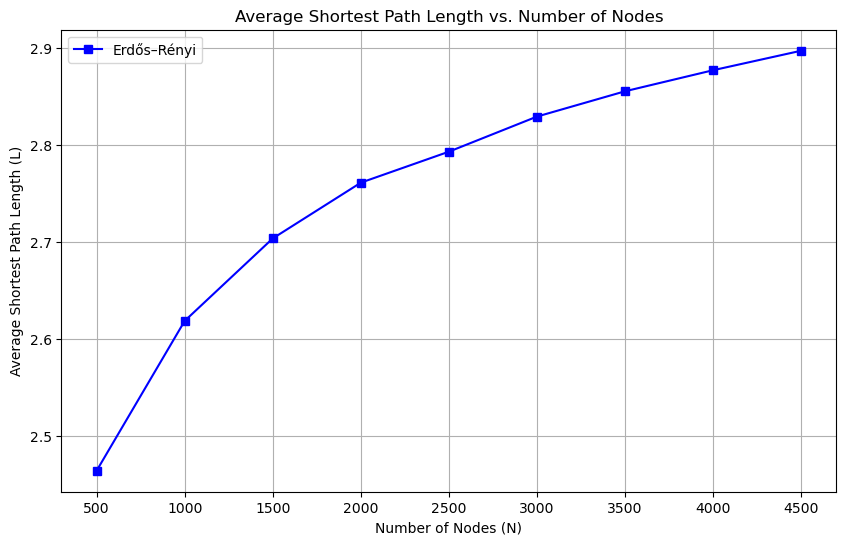

In [27]:
# Plot the results
N_values = np.arange(500, 5000, 500)

plt.figure(figsize=(10, 6))
plt.plot(N_values, Ler, 's-', label="Erdős–Rényi", color="blue")

# Customize the plot
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Shortest Path Length (L)')
plt.title('Average Shortest Path Length vs. Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()

## The Small-World (2° requirement)

High  **clustering coefficient** 

The **clustering coefficient** is a measure of how likely it is that a node's neighbors are also connected to each other. It provides insight into the local structure of the network, showing the tendency of nodes to form tightly-knit groups.

In **NetworkX**, we can compute the clustering coefficient of each node in a network using the built-in function:

```python
nx.clustering(G)
```

This function returns the clustering coefficient for each node in the graph G.

For more details, you can refer to the [documentation](https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.cluster.clustering.html).

Computing for N=100
Computing for N=200
Computing for N=300
Computing for N=400
Computing for N=500
Computing for N=600
Computing for N=700
Computing for N=800
Computing for N=900


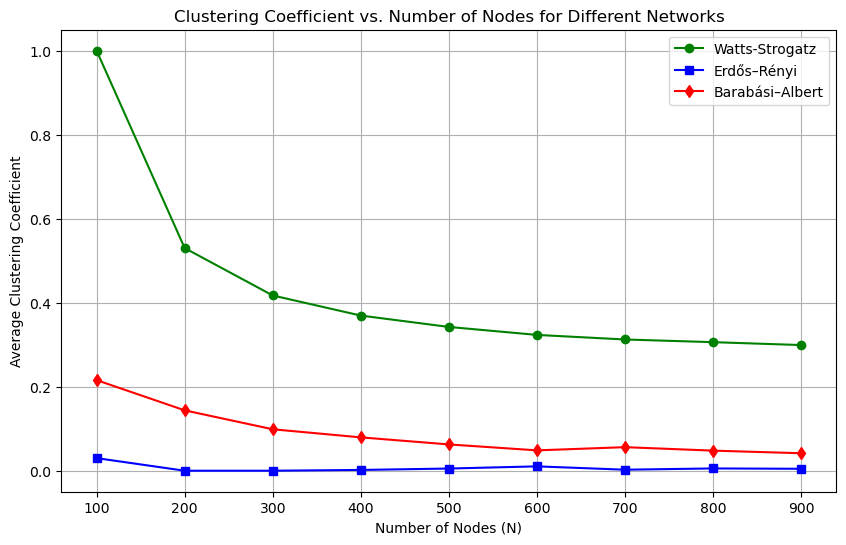

In [28]:
# Initialize lists to store the average clustering coefficients
Cws, Cer, Cba = [], [], []

# Loop over different values of N (number of nodes)
for N in np.arange(100, 1000, 100):
    print(f"Computing for N={N}")  # For tracking progress
    
    # Watts-Strogatz model
    G_ws = nx.watts_strogatz_graph(N, k_watts, p_watts)
    Cws.append(np.mean(list(nx.clustering(G_ws).values())))
    
    # Erdős-Rényi model
    G_er = nx.erdos_renyi_graph(N, p_erdos)
    Cer.append(np.mean(list(nx.clustering(G_er).values())))
    
    # Barabási-Albert model
    G_ba = nx.barabasi_albert_graph(N, m_barabasi)
    Cba.append(np.mean(list(nx.clustering(G_ba).values())))

# Plot the results
N_values = np.arange(100, 1000, 100)

plt.figure(figsize=(10, 6))

# Plot clustering coefficients for each model
plt.plot(N_values, Cws, 'o-', label="Watts-Strogatz", color="green")
plt.plot(N_values, Cer, 's-', label="Erdős–Rényi", color="blue")
plt.plot(N_values, Cba, 'd-', label="Barabási–Albert", color="red")

# Customize the plot
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Clustering Coefficient vs. Number of Nodes for Different Networks')
plt.legend()
plt.grid(True)
plt.show()


 1. **Erdős–Rényi**:
   $
   C_{\text{ER}} \approx p = \frac{k}{N}
   $
   Clustering is generally low due to random edge formation.

2. **Watts–Strogatz**:
   $
   C_{\text{WS}} \approx \frac{3(k - 2)}{4(k - 1)}
   $
   Clustering is high, especially for low rewiring probabilities.

3. **Barabási–Albert**:
   $
   C_{\text{BA}} \approx \frac{\log N}{N}
   $
   Clustering is low to moderate due to the presence of hubs and sparse connections between non-hub nodes.

## The Watts–Strogatz Model: Bridging Regular Lattices and Erdős–Rényi Networks


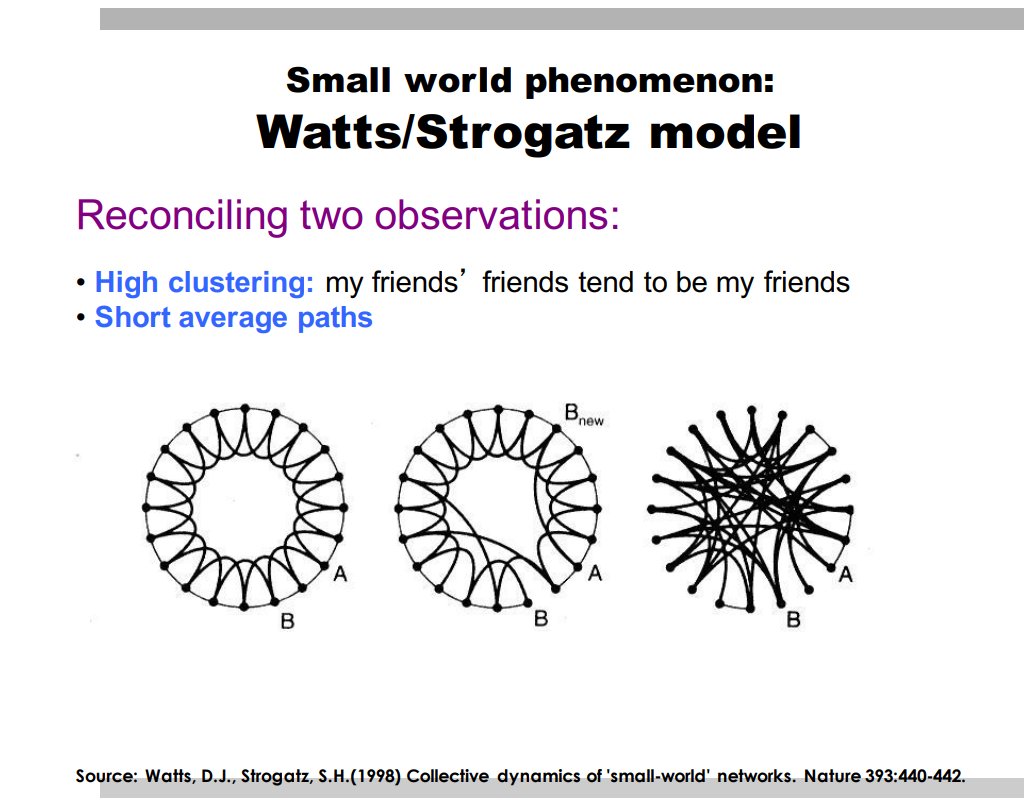

In [29]:
from IPython.display import Image
Image(filename='WSM.PNG') 

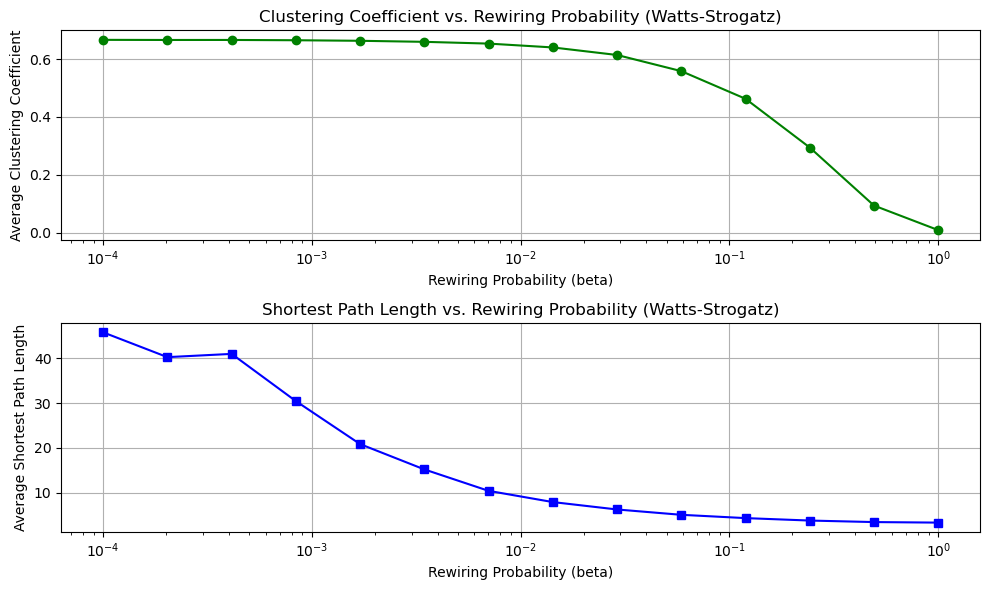

In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10
N = 1000

# Initialize lists to store results
C, L = [], []

# Define the range of beta values (rewiring probability) in a logarithmic scale
beta_values = np.logspace(np.log10(0.0001), np.log10(1.0), 14)

# Loop over different values of beta
for beta in beta_values:
    c_values, l_values = [], []
    
    # Repeat 10 times for each beta to get average values
    for _ in np.arange(10):
        G = nx.watts_strogatz_graph(N, k, beta)
        c_values.append(nx.average_clustering(G))
        l_values.append(nx.average_shortest_path_length(G))
    
    # Compute the average clustering coefficient and path length for this beta
    C.append(np.mean(c_values))
    L.append(np.mean(l_values))

# Plot results
plt.figure(figsize=(10, 6))

# Plot clustering coefficient
plt.subplot(2, 1, 1)
plt.plot(beta_values, C, 'o-', label="Clustering Coefficient", color='green')
plt.xscale('log')
plt.xlabel('Rewiring Probability (beta)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Clustering Coefficient vs. Rewiring Probability (Watts-Strogatz)')
plt.grid(True)

# Plot shortest path length
plt.subplot(2, 1, 2)
plt.plot(beta_values, L, 's-', label="Shortest Path Length", color='blue')
plt.xscale('log')
plt.xlabel('Rewiring Probability (beta)')
plt.ylabel('Average Shortest Path Length')
plt.title('Shortest Path Length vs. Rewiring Probability (Watts-Strogatz)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
